In [96]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
# Read in files
file = "portal_demog.csv"
file2 = "portal_ref_demog_sexuality.csv"
file3 = "portal_ref_demog_gender.csv"
file4 = "portal_ref_demog_age.csv"

In [98]:
# Read in file
data = pd.read_csv(file)
data.head()

,Response ID,country,state_province,age,gender,marital,sexuality,children,income,education
0,139,1,6,3,2,3,3,0,6,3
1,157,1,6,9,1,3,1,1,2,3
2,157000,1,6,9,1,3,1,1,2,3
3,174,1,5,3,2,3,1,2,5,6
4,177,1,6,4,1,1,1,0,6,2


In [99]:
 # Remove the rows with missing data
data = data.dropna(how="any")
data.count()

Response ID       256
country           256
state_province    256
age               256
gender            256
marital           256
sexuality         256
children          256
income            256
education         256
dtype: int64

In [100]:
# Counts by gender 1 = male ; 2 = female
gender_counts = data["gender"].value_counts()
gender_counts.head()

1    135
2    121
Name: gender, dtype: int64

In [101]:
# Counts by sexuality 1 = heterosexual; 2 = homosexual; 3 = bisexual; 4 = other; 5 = prefer not to answer
sexuality_counts = data["sexuality"].value_counts()
sexuality_counts.head()

1    221
2     22
3     12
4      1
Name: sexuality, dtype: int64

In [102]:
# Count how many sightings have occured within each state
age_counts = data["age"].value_counts()
age_counts

9    60
3    39
4    34
5    33
8    32
7    29
6    26
2     3
Name: age, dtype: int64

In [104]:
# Calculate the Number of Unique Users
num_users = data["Response ID"].nunique()
# Display the total number of players
total_df = pd.DataFrame({"Total Users": [num_users]})
total_df

,Total Users
0,256


In [105]:
# read in file2
data2 = pd.read_csv(file2)
data2.head()

,demog_id,demog_name
0,1,Heterosexual or straight
1,2,Homosexual
2,3,Bisexual
3,4,Other
4,5,I prefer not to say


In [106]:
# read in file3
data3 = pd.read_csv(file3)
data3.head()

,demog_gender_id,demog_gender_name
0,1,Male
1,2,Female
2,3,Other


In [122]:
# read in file4
data4 = pd.read_csv(file4)
data4.head()

,demog_age_id,demog_age_name,demog_age_group
0,1,Under 18,Generation Z
1,2,18-20,Generation Z
2,3,21-25,Millenials
3,4,26-30,Millenials
4,5,31-35,Millenials


In [123]:
# Group sexuality based on reference number

heterosexual = data[data["sexuality"] == 1]
homosexual = data[data["sexuality"] == 2]
bisexual = data[data["sexuality"] == 3]
other = data[data["sexuality"] == 4]
prefer_not_to_say = data[data["sexuality"] == 5]


In [124]:
# Create sexuality dataframe
sexuality_table = pd.DataFrame({"Heterosexual": [len(heterosexual)],
                              "Homosexual": [len(homosexual)],
                                "Bisexual": [len(bisexual)],
                                "Other": [len(other)],
                                "Prefer Not To Say": [len(prefer_not_to_say)]
                              })

sexuality_table

,Heterosexual,Homosexual,Bisexual,Other,Prefer Not To Say
0,221,22,12,1,0


In [125]:
# Calculate the Number and Percentage by Sexuality
heterosexual_totals = sexuality_table["Heterosexual"]
heterosexual_percents = heterosexual_totals / num_users * 100
homosexual_totals = sexuality_table["Homosexual"]
homosexual_percents = homosexual_totals / num_users * 100
bisexual_totals = sexuality_table["Bisexual"]
bisexual_percents = bisexual_totals / num_users * 100
other_totals = sexuality_table["Other"]
other_percents = other_totals / num_users * 100
not_totals = sexuality_table["Prefer Not To Say"]
not_percents = not_totals / num_users * 100

# Create Sexuality DataFrame
sexuality_demographics = pd.DataFrame({"Total Heterosexual Count": heterosexual_totals, 
                                    "Percentage of Heterosexuals": heterosexual_percents,
                                       "Total Homosexual Count": homosexual_totals, 
                                    "Percentage of Homorosexuals": homosexual_percents,
                                       "Total Bisexual Count": bisexual_totals, 
                                    "Percentage of Bisexuals": bisexual_percents,
                                       "Total Other Count": other_totals, 
                                    "Percentage of Other": other_percents,
                                       "Total No Answer Count": not_totals, 
                                    "Percentage of No Answers": not_percents
                                      })

# Minor Data Munging
sexuality_demographics = sexuality_demographics.round(2)

sexuality_demographics

,Total Heterosexual Count,Percentage of Heterosexuals,Total Homosexual Count,Percentage of Homorosexuals,Total Bisexual Count,Percentage of Bisexuals,Total Other Count,Percentage of Other,Total No Answer Count,Percentage of No Answers
0,221,86.33,22,8.59,12,4.69,1,0.39,0,0.0


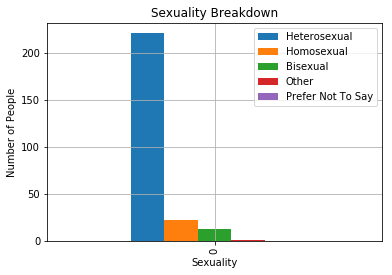

In [112]:
# Create Sexuality Breakdown Graph
sexuality_table.plot.bar()
plt.title("Sexuality Breakdown")
plt.ylabel("Number of People")
plt.xlabel("Sexuality")
plt.grid(True)

plt.show()

# Most users consider themselves to be heterosexual (86.33%)

In [134]:
# Group sexuality based on reference number
male = data[data["gender"] == 1]
female = data[data["gender"] == 2]
other = data[data["gender"] == 3]
print(len(female))

121


In [135]:
# Create gender dataframe
gender_table = pd.DataFrame({"Male": [len(male)],
                              "Female": [len(female)],
                                "Other": [len(other)]
                              })

gender_table

,Male,Female,Other
0,135,121,0


In [136]:
# Calculate the Number and Percentage by Sexuality
total_gender_count = gender_table["Male"]+gender_table["Female"]+gender_table["Other"]

male_totals = gender_table["Male"]
male_percents = male_totals / total_gender_count * 100
female_totals = gender_table["Female"]
female_percents = female_totals / total_gender_count * 100
other_totals = gender_table["Other"]
other_percents = other_totals / total_gender_count * 100


# Create Sexuality DataFrame
gender_demographics = pd.DataFrame({"Total Male Count": male_totals, 
                                    "Percentage of Males": male_percents,
                                       "Total Female Count": female_totals, 
                                    "Percentage of Females": female_percents,
                                       "Total Other Count": other_totals, 
                                    "Percentage of Others": other_percents
                                      })

# Minor Data Munging
gender_demographics = gender_demographics.round(2)

gender_demographics

,Total Male Count,Percentage of Males,Total Female Count,Percentage of Females,Total Other Count,Percentage of Others
0,135,52.73,121,47.27,0,0.0


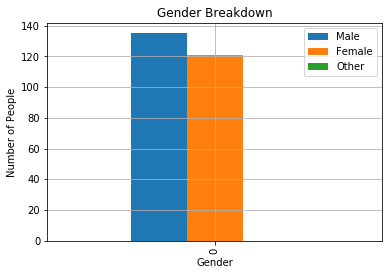

In [137]:
# Create Gender Breakdown graph
gender_table.plot.bar()
plt.title("Gender Breakdown")
plt.ylabel("Number of People")
plt.xlabel("Gender")
plt.grid(True)

plt.show()

# The majority of users are male

In [138]:
# Group generation data based on reference number

under18 = data[data["age"] == 1]
_18_20= data[data["age"] == 2]
_21_25 = data[data["age"] == 3]
_26_30 = data[data["age"] == 4]
_31_35 = data[data["age"] == 5]
_36_40 = data[data["age"] == 6]
_41_45 = data[data["age"] == 7]
_46_55 = data[data["age"] == 8]
_56_79 = data[data["age"] == 9]
_80plus = data[data["age"] == 10]


In [139]:
# Create sexuality dataframe
age_table = pd.DataFrame({"Under 18": [len(under18)],
                              "18-20": [len(_18_20)],
                                "21-25": [len(_21_25)],
                                "26-30": [len(_26_30)],
                                "31-35": [len(_31_35)],
                          "36-40": [len(_36_40)],
                          "41-45": [len(_41_45)],
                          "46-55": [len(_46_55)],
                          "56-79": [len(_56_79)],
                          "80 Plus": [len(_80plus)]
                              })

age_table

,Under 18,18-20,21-25,26-30,31-35,36-40,41-45,46-55,56-79,80 Plus
0,0,3,39,34,33,26,29,32,60,0


In [140]:
# Calculate the Number and Percentage by Sexuality
total_age_count = gender_table["Male"]+gender_table["Female"]+gender_table["Other"]

male_totals = gender_table["Male"]
male_percents = male_totals / total_gender_count * 100
female_totals = gender_table["Female"]
female_percents = female_totals / total_gender_count * 100
other_totals = gender_table["Other"]
other_percents = other_totals / total_gender_count * 100


# Create Sexuality DataFrame
gender_demographics = pd.DataFrame({"Total Male Count": male_totals, 
                                    "Percentage of Males": male_percents,
                                       "Total Female Count": female_totals, 
                                    "Percentage of Females": female_percents,
                                       "Total Other Count": other_totals, 
                                    "Percentage of Others": other_percents
                                      })

# Minor Data Munging
gender_demographics = gender_demographics.round(2)

gender_demographics

,Total Male Count,Percentage of Males,Total Female Count,Percentage of Females,Total Other Count,Percentage of Others
0,135,52.73,121,47.27,0,0.0


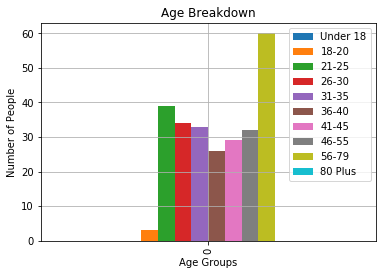

In [141]:
# Create Age Breakdown graph
age_table.plot.bar()
plt.title("Age Breakdown")
plt.ylabel("Number of People")
plt.xlabel("Age Groups")
plt.grid(True)
plt.show()

